# Single Neuron Linear Regression & Gradient Descent

Linear regression is used to predict the value of a variable based on another variable. We do this by using gradient descent. Gradient descent is an optimization algorithm for finding a local minimum of a differentiable function.

## A little bit about Linear Regression.

The main quality that one should have with linear regression is that there is a roughly linear relationship between the input data, {x1,x2...xn}, and the output data, {y1,y2...yn}. This relationship between the independent and dependent variables is important to have in order for linear regression to accurately modelt he relationship. The goal for linear regression is to find the best line of fit that minimizes a certain cost function that contains the differences between the expected and actual values of the dependent variable (we want to minimize this error).

As opposed to the perceptron, linear regression is used to predict continuous values, while the perceptron predicts discrete binary values. In order for linear regression to determine a boundary line, it uses a linear activation function, rather than the perceptron's sign function. As denoted by the picture below, the linear activation function takes the linear combination of all the inputs and each of its corresponding weights, and it ouputs a single value, z. The weights and bias terms are minimized during the training process and the differences are minimized. The output, z, is the predicted value of the dependent variable. So, the linear activation function will look like this: z= b + w1x1 + w2x2 +...+wnxn.


<p align="center">
    <img src="regression_neuron.png" width="500">
</p>
(diagram credit to Dr. Davila :))

Additionally, you can see that a cost function must be defined as well in order to train the model. Typically, we use the MSE (mean-squared error) for basic linear regresion cases like these, but other cost functions like MAE (mean absolute error) can also be used. MSE takes each predicted - actual difference value and squares it, adds thos squared differences together, and divides them across the number of inputs to get an average of these squared differences across the dataset. The training process aims to minimize the value of the MSE function.

## A little bit about Gradient Descent.

In order to minimize the MSE function, we use gradient descent! This optimization algorithm aims to find a local minimum of a differentiable function. It starts with an initial guess, an initial set of weights and bias, and updates the next iteration to be a little closer to the minima. It does this by using a step length hyperparameter, which determines how far of a step the algorithm should take for the next iteration. Gradient descent moves in the direction opposite to the sign of the derivative. As the model trains, the weights and biases are repeatedly updated to reflect the cost function reaching a minimum. Once it reaches the minimum, the trained model can then be used to make predictions on new data!

Batch gradient descent and stochastic gradient descent can both be used to train models. Batch gradient descent will calculate the entire gradient for every epoch over the entire training set. This results in a very slow and computationally expensive algorithm. Conversely, stochastic gradient descent picks an instance of the training data at each epoch and then computes the gradient there. This is much faster, as there is less data to manipulate. For our single neuron model, this is the preferred method.
 

# Application

In this module, we will implement linear regression on the Gentoo Penguins portion of the Palmer Penguins dataset. Provided here is the SingleNeuron class that implements all of the math into code. 

In [40]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 
    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


We begin our regression journey here! Notice how we import LinearRegression, train_test_split, mean_squared_error, and r2_score. These are pre-written modules developed by sklearn, so we can just use them as such in our application! Imports like these make our lives a lot easier and reduce the amount of code that we have to write.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
sns.set_theme()

#We a) load in the data, b) narrow it down to only the relevant rows, c) drop NaN values, and d) check out the first few entries
df = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\Datasets\palmer_penguins.csv")
df = df.iloc[220:]
df = df.dropna()

df.head()


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male


Next, we plot the data to see if we can approximate a roughly linear relationship between bill length and bill depth- i.e. we check if linear regression is even an appropriate model to use here.

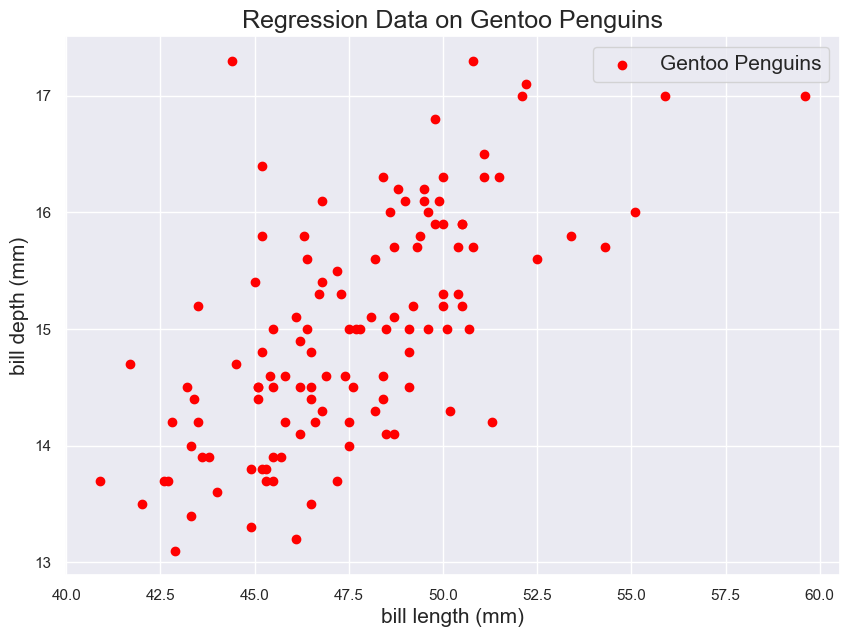

In [42]:

plt.figure(figsize = (10, 7))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "red",
            label = "Gentoo Penguins")
plt.xlabel("bill length (mm)", fontsize = 15)
plt.ylabel("bill depth (mm)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Regression Data on Gentoo Penguins", fontsize = 18)
plt.show()


Fortunately, it exists- you can definitely draw a potential line here! We are now going to convert the data into a numpy.ndarray and extract out the relevant columns.

In [43]:
X = df['bill_length_mm'].values.reshape(-1, 1) #specifically reshapes to -1 and 1
y = df['bill_depth_mm'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We train the model!

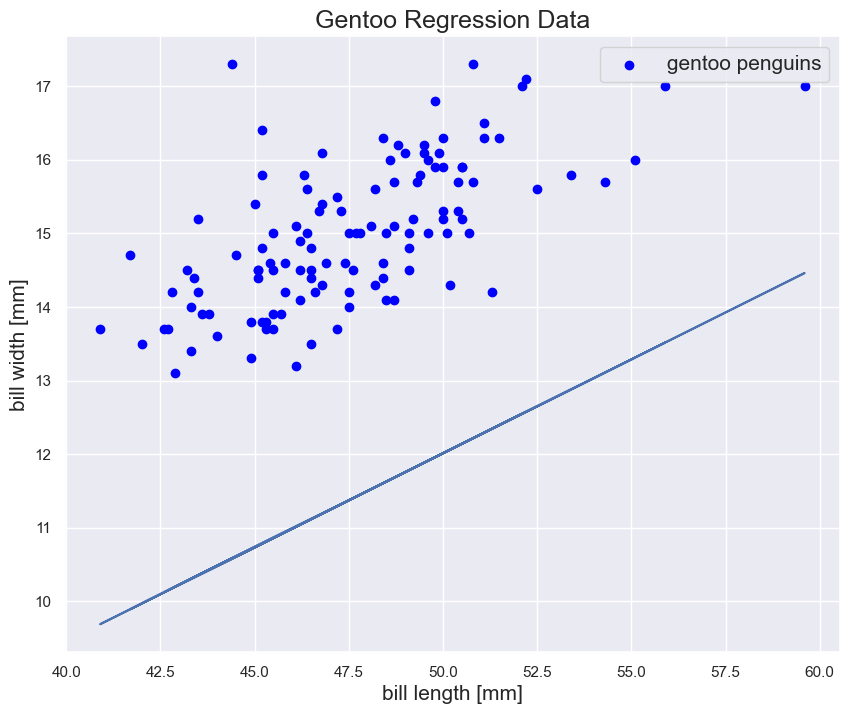

In [44]:
def linear_activation(z):
    return z

model = SingleNeuron(linear_activation)
model.train(X, y, alpha = 0.0008, epochs = 1000)

y_pred = model.predict(X_test)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "blue", label = "gentoo penguins")
plt.plot(X, model.predict(X.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill width [mm]", fontsize = 15)
plt.title("Gentoo Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Our step size is too large! Let's make it smaller to improve the accuracy.

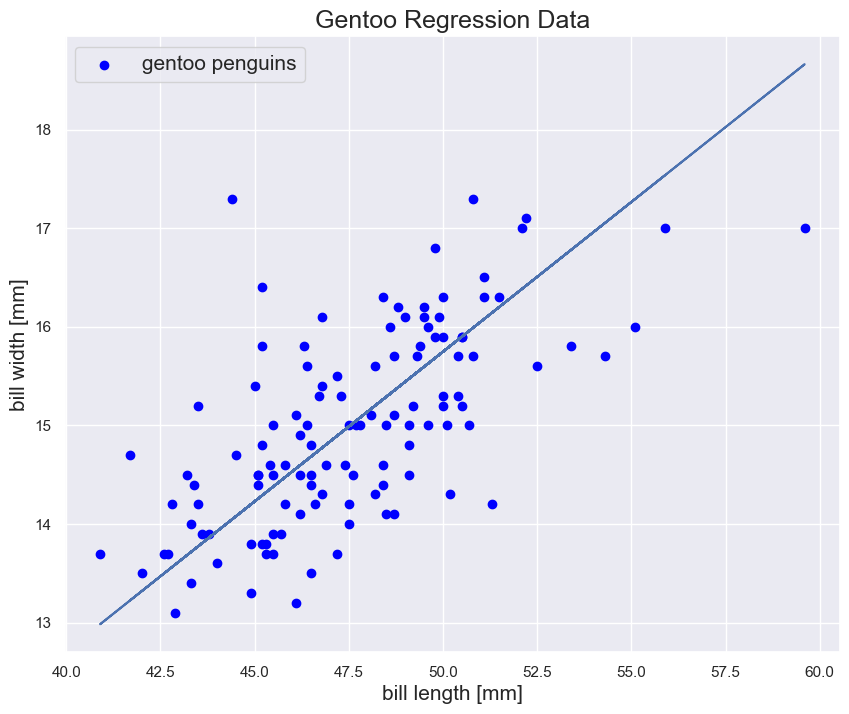

In [45]:
model = SingleNeuron(linear_activation)
model.train(X, y, alpha = 0.0001, epochs = 1000)

y_pred = model.predict(X_test)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "blue", label = "gentoo penguins")
plt.plot(X, model.predict(X.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill width [mm]", fontsize = 15)
plt.title("Gentoo Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Check out the errors and accuracy.

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.4316037288278454
R^2 Score: 0.5636387211176739


Plotting the final result.

In [47]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)




We graph the MSE of the model.

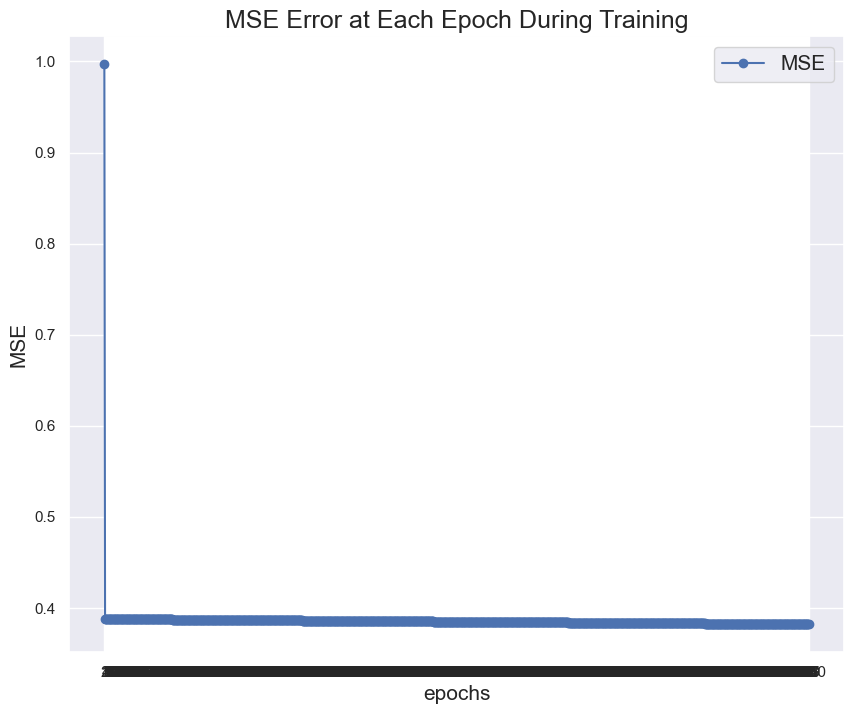

In [49]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(model.errors_) + 1), 
         model.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(model.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Yay! We have now learned two important single neuron models. Next, we move onto more complex models.